```python
print 'Some links'
```
https://www.youtube.com/watch?v=uxourrlPlf8

https://www.youtube.com/watch?v=Gl3EjiVlz_4

https://www.youtube.com/watch?v=8V2sX9BhAW8

https://www.youtube.com/watch?v=cP035M_w82s

neat algorithm
    
    

In [22]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [102]:
# Define some initial params
# Dimensionality
Dn = 10       #Size of dimensions (features)  #first take it 2 , for 100 points and then change it to 10

# Mutation probability
M = 0.1             #5%       # change mutation each time

# Population size
NP = 500

# No. of generations
G = 500                #No of epochs(kitni bar tumhe apni poup ko regenerate krna h )

In [103]:
# We genrate a random vector 

r = np.random.random((Dn,))          # r is our random vector of size(20,)
def f(x):
    return ((x - r)**4). sum()       # this is for square function change it to 4 th power also basically it returns the min value that will be at r ony

print r


[0.61740601 0.19510625 0.89642232 0.96779442 0.52721947 0.59436397
 0.70985514 0.28527501 0.18223642 0.3872466 ]


In [104]:
# Generate population
pop = []

for ix in range(NP):
    # generate a random vector
    vec = np.random.uniform(-10, 10, (Dn,))  #It generate a random no btw the range (-10,10) 
    #print vec
    # Add to population
    pop.append(vec) 
    #print pop                    # Each vector of shape (20,)

print len(pop)

500


### Now functions for evoultion

In [105]:
def crossover(parent_1, parent_2):         #Two parameter vectors
    child_1 = np.zeros(parent_1.shape)     #This childs also is of same shape
    child_2 = np.zeros(parent_2.shape)
     
    dim = int(parent_1.shape[0] / 2.0)     #And first we need a dimension on that basisi we split them and bulid  anew  child vecotr
    # basically what we have done we split the vectors half of the contribution from ist and gthe rest half is of 2
    #print dim
    child_1[:dim] = parent_1[:dim]      #We make two childs 
    child_1[dim:] = parent_2[dim:]
    
    child_2[:dim] = parent_2[:dim]
    child_2[dim:] = parent_1[dim:]
    
    return child_1, child_2

#IInd operation of evolutonary mutate we remove  any random value and fix into them a new random value that makes a new vector in a 3d space
# Mutation  bascially add random value or noise so that the sam e pattern doesnot repeat 
def mutate(x):   #x is basically here childs that generate by croosover fucntion
    for ix in range(x.shape[0]):          #let say x is of 10d vector so x.shape[0] is 10
        # Generate a random numbe r for probability
        R = np.random.random()     #Take a random no.
        
        if R < M:       #if R(random no) is lessa than out Mutate percentage 
            # Mutate random index 
            x[ix] = np.random.uniform(-5, 5)  #Then usko mutate kro otherwise pass the same vector 
            #print x[ix] 
        else:
            pass
    return x

In [106]:
# Main loop

loss = []

# Main Genetic Algo loop 
for gx in range(G):           # This loopis for epoch kitni bar hme ne w vectors banne h
    pop = sorted(pop, key=lambda z: f(z ))          # if lam is z the its loss is f(z) so sort on the basis of pop jiska sbse kam loss ohle jiska sbse jada loss sbse bad me
    print "Generation: {} | Best Value: {}".format(gx, f(pop[0]))  #har generatin ka best value print kr dia
    loss.append(f(pop[0]))     # We bascially append the best value pop loss through function in loss list
    
    # create a temp population
    temp = []
    
    while not len(temp) == NP:    #jabtk meri temo pop ka leng main population tk nhi hota tabtk we genrate the new vectors
        
        # Select 2 parents from good section of population
        p1, p2 = random.sample(pop[:int(NP/2.0)], 2) 
        #print p1.shape  #(DM,)
        # random.sample returns the two random vectors out of all population the second paramter 2 is denoting how many we have to generate 
        # we pick these two parent vectors in top 50% pop because pop list is sorted starting me jo vectors hai 
        #unka loss kam h so to make children also better we pick from top 50 only
        # Apply crossover
        c1, c2 = crossover(p1, p2) 
        
        # mutate
        c1 = mutate(c1) 
        c2 = mutate(c2)
        
        temp.append(c1)
        temp.append(c2)
    
    # create a combined population
    comb = temp + pop        #After loop we add both pop now comb have 200 sorted elements based on losses
    
    # survival of the fittest
    pop = sorted(comb, key=lambda z: f(z))[:NP]    # So we extract top k 100 vectors now this is best pop

Generation: 0 | Best Value: 2188.84402151
Generation: 1 | Best Value: 563.512864634
Generation: 2 | Best Value: 563.512864634
Generation: 3 | Best Value: 308.961919568
Generation: 4 | Best Value: 193.628625826
Generation: 5 | Best Value: 134.858379427
Generation: 6 | Best Value: 101.314326031
Generation: 7 | Best Value: 59.8328314678
Generation: 8 | Best Value: 32.8892455679
Generation: 9 | Best Value: 17.9399354821
Generation: 10 | Best Value: 17.9399354821
Generation: 11 | Best Value: 7.2171403203
Generation: 12 | Best Value: 3.09333789795
Generation: 13 | Best Value: 3.09333789795
Generation: 14 | Best Value: 3.09333789795
Generation: 15 | Best Value: 1.15782323207
Generation: 16 | Best Value: 1.15782323207
Generation: 17 | Best Value: 1.15782323207
Generation: 18 | Best Value: 1.06800350958
Generation: 19 | Best Value: 0.574560512577
Generation: 20 | Best Value: 0.549584937457
Generation: 21 | Best Value: 0.513807133669
Generation: 22 | Best Value: 0.193515749318
Generation: 23 | B

Generation: 179 | Best Value: 2.75813456878e-08
Generation: 180 | Best Value: 2.75813456878e-08
Generation: 181 | Best Value: 2.68129906766e-08
Generation: 182 | Best Value: 2.68129906766e-08
Generation: 183 | Best Value: 2.68129906766e-08
Generation: 184 | Best Value: 2.68129906766e-08
Generation: 185 | Best Value: 2.68129906766e-08
Generation: 186 | Best Value: 2.68129906766e-08
Generation: 187 | Best Value: 2.68129906766e-08
Generation: 188 | Best Value: 2.68129906766e-08
Generation: 189 | Best Value: 2.68129906766e-08
Generation: 190 | Best Value: 2.68129906766e-08
Generation: 191 | Best Value: 2.68129906766e-08
Generation: 192 | Best Value: 2.68129906766e-08
Generation: 193 | Best Value: 2.0098136535e-08
Generation: 194 | Best Value: 2.0098136535e-08
Generation: 195 | Best Value: 2.0098136535e-08
Generation: 196 | Best Value: 2.0098136535e-08
Generation: 197 | Best Value: 2.0098136535e-08
Generation: 198 | Best Value: 2.0098136535e-08
Generation: 199 | Best Value: 2.0098136535e-08

Generation: 361 | Best Value: 1.20302918941e-09
Generation: 362 | Best Value: 1.20302918941e-09
Generation: 363 | Best Value: 1.20302918941e-09
Generation: 364 | Best Value: 1.20302918941e-09
Generation: 365 | Best Value: 1.20302918941e-09
Generation: 366 | Best Value: 1.20302918941e-09
Generation: 367 | Best Value: 1.20302918941e-09
Generation: 368 | Best Value: 1.20302918941e-09
Generation: 369 | Best Value: 1.20302918941e-09
Generation: 370 | Best Value: 1.20302918941e-09
Generation: 371 | Best Value: 1.20302918941e-09
Generation: 372 | Best Value: 1.20302918941e-09
Generation: 373 | Best Value: 1.20302918941e-09
Generation: 374 | Best Value: 1.20302918941e-09
Generation: 375 | Best Value: 1.20302918941e-09
Generation: 376 | Best Value: 1.20302918941e-09
Generation: 377 | Best Value: 1.20302918941e-09
Generation: 378 | Best Value: 1.20302918941e-09
Generation: 379 | Best Value: 1.20302918941e-09
Generation: 380 | Best Value: 1.20302918941e-09
Generation: 381 | Best Value: 1.20302918

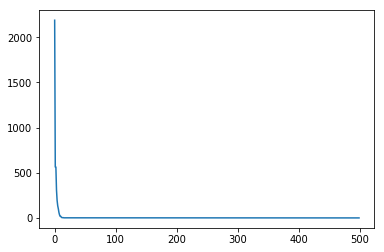

In [107]:
plt.plot(loss)

In [108]:
print pop[0], r    # these are preetty same means we reached at optimization  #[0.16403377 0.69021983] [0.16764689 0.70466311]
#our best vector pop[0] is similar to our r vectoe  


#When dm =2

[0.61784152 0.1944427  0.89670131 0.96775893 0.52816521 0.59281182
 0.70936974 0.28508748 0.18211382 0.38663559] [0.61740601 0.19510625 0.89642232 0.96779442 0.52721947 0.59436397
 0.70985514 0.28527501 0.18223642 0.3872466 ]


In [109]:
#For self practice

In [110]:
for ix in range(10):
    crl = np.random.uniform(-10,10,(2,2))
    print crl

[[ 4.51468513 -8.57156046]
 [ 5.18803273 -9.83417855]]
[[ 3.27165072  9.45365428]
 [ 1.01489863 -2.94896508]]
[[7.5672628  6.99114153]
 [1.73508338 2.26387777]]
[[ 6.17519747 -8.10443781]
 [-0.41689814 -5.97035829]]
[[-7.11764473 -6.99626031]
 [-2.83139108  4.18386887]]
[[ 4.26953524  7.4879045 ]
 [ 2.36298972 -3.71584735]]
[[ 6.2441277   4.14090567]
 [-6.94024733  6.58100506]]
[[ 9.32696504 -8.31634621]
 [ 9.58372217  4.95654874]]
[[-3.71644989  0.28619655]
 [-8.22368362  1.17883362]]
[[-4.82306318  4.1640447 ]
 [-9.99140677 -8.91555396]]
